In [1]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
def get_value_pdf_by_distance(dist):
    '''
    Returns a probability density function for a value given a distance.
    '''
    def pdf(value):
        expected_value = max(1-abs(dist)*3, 0)
        standard_deviation = 0.1
        return stats.norm(expected_value, standard_deviation).pdf(value)
    return pdf

def log_likelihood_by_value_position(values, positions, position_to_test):
    log_probability = 1
    assert len(values) == len(positions)
    n = len(values)
    distances = np.abs(positions-position_to_test)
    for i in range(n):
        value_pdf = get_value_pdf_by_distance(distances[i])
        probability = value_pdf(values[i])
        log_probability += math.log(probability)
    return log_probability

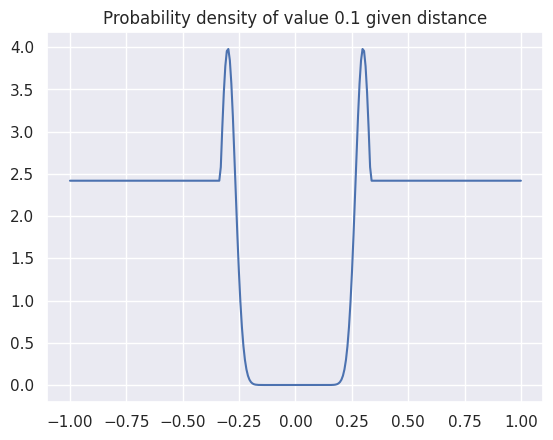

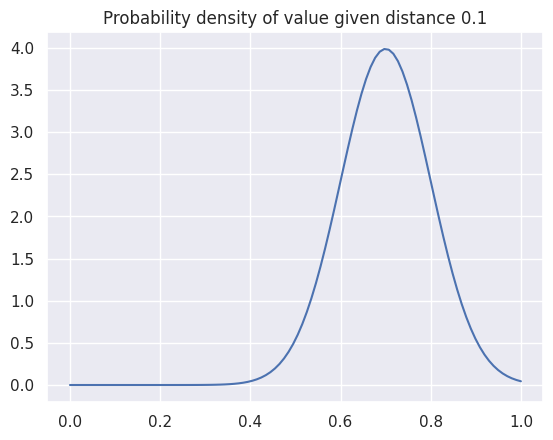

In [11]:
xs = np.linspace(-1,1,300)
ys = [get_value_pdf_by_distance(x)(0.1) for x in xs]
plt.plot(xs,ys)
plt.title('Probability density of value 0.1 given distance')
plt.show()

xs = np.linspace(0,1,100)
ys = [get_value_pdf_by_distance(0.1)(x) for x in xs]
plt.plot(xs,ys)
plt.title('Probability density of value given distance 0.1')
plt.show()

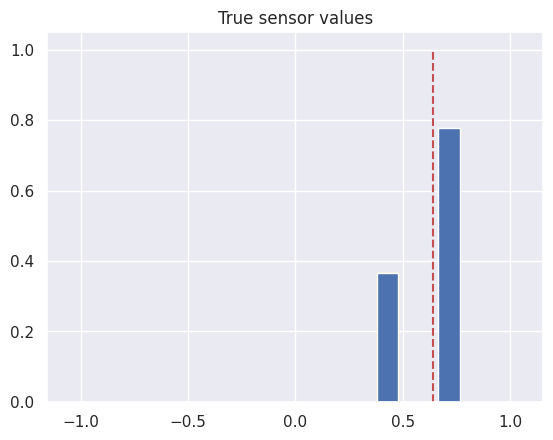

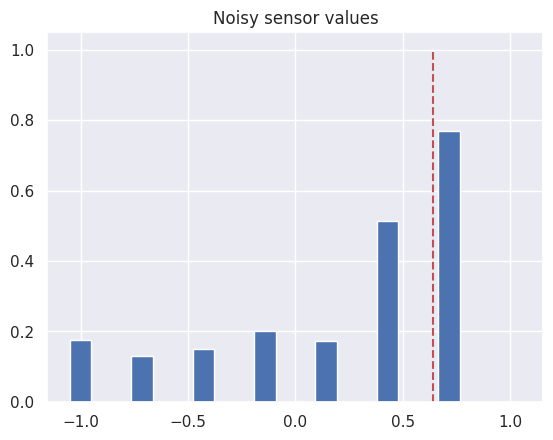

In [44]:
xs = np.linspace(-1,1,250)
ps = np.linspace(-1,1,8) # positions of sensors

def simulate_sensor(position):
    '''
    Simulates a sensor with line at position.
    '''
    xs = np.linspace(-1,1,8)
    ds = np.abs(xs-position)
    vs = 1-ds*3
    vs[vs<0] = 0
    return vs

pos = 0.64
vs = simulate_sensor(pos)
plt.bar(x=ps,height=vs,width=0.1)
plt.plot([pos,pos],[0,1],'r--')
plt.title('True sensor values')
plt.show()

noise = np.random.normal(0.1,0.2,8)
vs += noise
vs[vs<0] = 0
plt.bar(x=ps,height=vs,width=0.1)
plt.plot([pos,pos],[0,1],'r--')
plt.title('Noisy sensor values')
plt.show()

True position: 0.63
Estimated position by max likelihood: 0.63
Error: 0.08%
Estimated position by weighted average: 0.62
Error: 2.32%


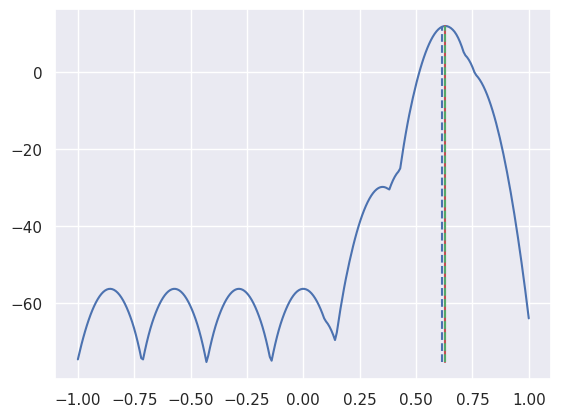

In [42]:
def error(true, estimated):
    return 100 * np.abs(true-estimated) / true

ys = [log_likelihood_by_value_position(vs,ps,position) for position in xs]
true_value = pos
estimation_bayes = xs[np.argmax(ys)]
estimation_weighted_average = np.average(ps,weights=vs)
print("True position: {:.2f}".format(pos))
print("Estimated position by max likelihood: {:.2f}".format(estimation_bayes))
print("Error: {:.2f}%".format(error(true_value,estimation_bayes)))
print("Estimated position by weighted average: {:.2f}".format(np.average(ps,weights=vs)))
print("Error: {:.2f}%".format(error(true_value,estimation_weighted_average)))
plt.plot(xs,ys)
min_y = min(ys)
max_y = max(ys)
plt.plot([true_value,true_value],[min_y,max_y],'r-')
plt.plot([estimation_bayes,estimation_bayes],[min_y,max_y],'g--')
plt.plot([estimation_weighted_average,estimation_weighted_average],[min_y,max_y],'b--')
plt.show()